## Let's try fitting some data

In [139]:
import random
random.seed(31415)
x = list(range(-4, 5))
y = [xi + 2*random.gauss() for xi in x]  # random.gauss() gives noise in N(0,1)
list(zip(x,y))

[(-4, -5.3729660577870675),
 (-3, -3.8711540919150544),
 (-2, -1.5600542258887458),
 (-1, -1.3931552144999728),
 (0, -2.0592018844004354),
 (1, 0.6631879282549225),
 (2, 1.4047983313865346),
 (3, 0.13261451347305853),
 (4, 3.7386171355511175)]

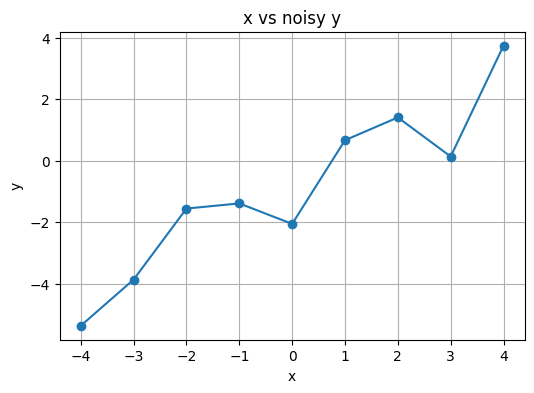

In [94]:
import matplotlib.pyplot as plt

# Plot

plt.figure(figsize=(6,4))
plt.plot(x, y, marker='o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs noisy y")
plt.grid(True)
plt.show()

In [95]:
import statsmodels.api as sm

# Build a DataFrame for statsmodels
df = pd.DataFrame({
    "x": x,
    "y": y
})

# Add intercept term automatically
df = sm.add_constant(df)

# Fit OLS:  y ~ β0 + β1*x
model = sm.OLS(df["y"], df[["const", "x"]])
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     45.93
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           0.000259
Time:                        14:54:39   Log-Likelihood:                -12.292
No. Observations:                   9   AIC:                             28.58
Df Residuals:                       7   BIC:                             28.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9241      0.358     -2.578      0.0

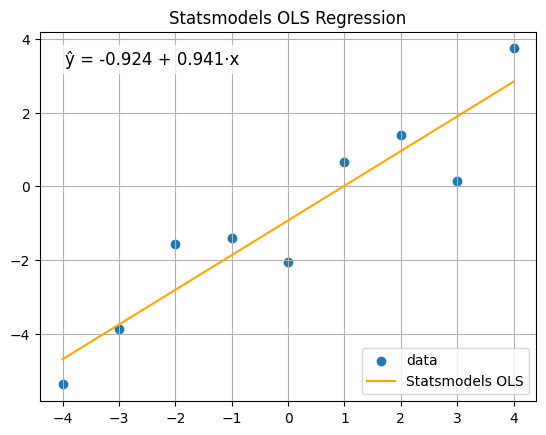

In [96]:
# Predict using the fitted model
y_pred_sm = results.predict(df[["const", "x"]])

# ---- Extract coefficients ----
b0 = results.params["const"]
b1 = results.params["x"]

# Format equation nicely
eqn = f"ŷ = {b0:.3f} + {b1:.3f}·x"


# Plot
plt.scatter(df["x"], df["y"], label="data")
plt.plot(df["x"], y_pred_sm, color="orange", label="Statsmodels OLS")

# Add formula onto plot
plt.text(
    0.05, 0.95, eqn,
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="none")
)


plt.legend()
plt.grid(True)
plt.title("Statsmodels OLS Regression")
plt.show()

In [97]:
# Scikit-Learn

OLS slope: 0.9407281141137089
OLS intercept: -0.9241459517584047


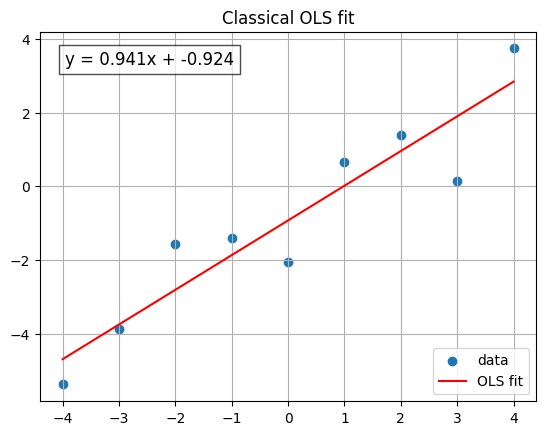

In [98]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Reshape x for sklearn
X = np.array(x).reshape(-1, 1)
Y = np.array(y)

ols = LinearRegression()
ols.fit(X, Y)

print("OLS slope:", ols.coef_[0])
print("OLS intercept:", ols.intercept_)

# Predict line
y_pred_ols = ols.predict(X)

slope = ols.coef_[0]
intercept = ols.intercept_

# Plot
plt.scatter(x, y, label="data")
plt.plot(x, y_pred_ols, color="red", label="OLS fit")


# Add regression formula to the plot
formula = f"y = {slope:.3f}x + {intercept:.3f}"
plt.text(
    0.05, 0.95,
    formula,
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.7)
)

plt.legend()
plt.title("Classical OLS fit")
plt.grid(True)
plt.show()

SGD slope: 0.7376346593843425
SGD intercept: -0.9675892765726604


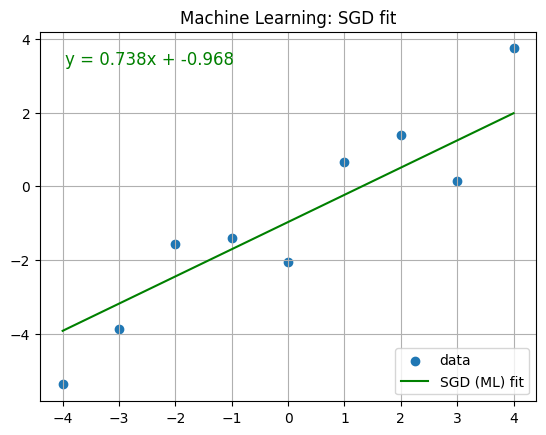

In [99]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(
    max_iter=100000,
    eta0=0.05,
    learning_rate="constant",
    penalty='l2', alpha=0.0001)           # <---- disables regularisation

sgd.fit(X, Y)

print("SGD slope:", sgd.coef_[0])
print("SGD intercept:", sgd.intercept_[0])

slope = sgd.coef_[0]
intercept = sgd.intercept_[0]

y_pred_sgd = sgd.predict(X)

eq_text = f"y = {slope:.3f}x + {intercept:.3f}"

plt.scatter(x, y, label="data")
plt.plot(x, y_pred_sgd, color="green", label="SGD (ML) fit")
plt.text(
    0.05, 0.95, eq_text,
    transform=plt.gca().transAxes,
    fontsize=12, verticalalignment="top", color="green"
)
plt.legend()
plt.title("Machine Learning: SGD fit")
plt.grid(True)
plt.show()

In [100]:
# EMPTY FOR YOUR WORK

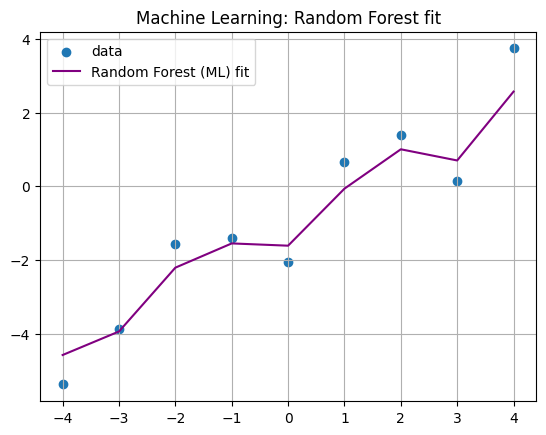

In [101]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200)
rf.fit(X, Y)

y_pred_rf = rf.predict(X)

plt.scatter(x, y, label="data")
plt.plot(x, y_pred_rf, color="purple", label="Random Forest (ML) fit")
plt.legend()
plt.title("Machine Learning: Random Forest fit")
plt.grid(True)
plt.show()

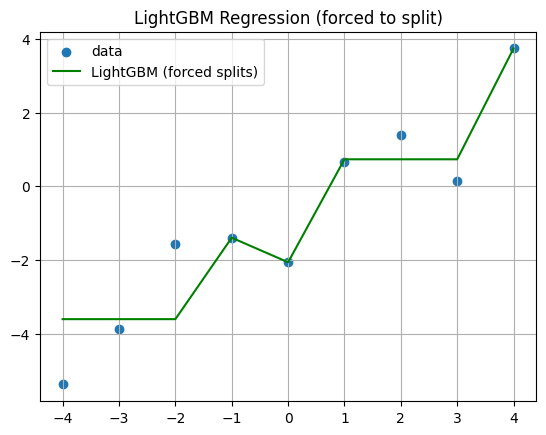

In [102]:
from lightgbm import LGBMRegressor
import pandas as pd


lgbm = LGBMRegressor(   # Force LGBM to split on tiny datasets
    n_estimators=200,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    min_data_in_leaf=1,
    min_child_samples=1,
    min_split_gain=0.0,
    verbose=-1     # <-- silence warnings/info
)

import pandas as pd

X_named = pd.DataFrame(X, columns=["feature"])
lgbm.fit(X_named, Y)
y_pred = lgbm.predict(X_named)

plt.scatter(x, y, label="data")
plt.plot(x, y_pred, color="green", label="LightGBM (forced splits)")
plt.legend()
plt.grid(True)
plt.title("LightGBM Regression (forced to split)")
plt.show()

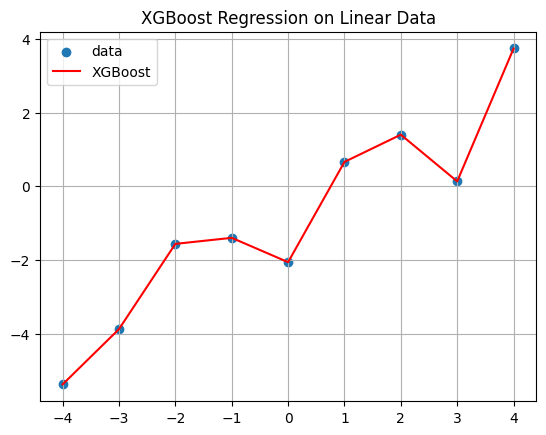

In [103]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective="reg:squarederror"
)

xgb.fit(X, Y)
y_pred_xgb = xgb.predict(X)

plt.scatter(x, y, label="data")
plt.plot(x, y_pred_xgb, color="red", label="XGBoost")
plt.legend()
plt.title("XGBoost Regression on Linear Data")
plt.grid(True)
plt.show()

How can we tell which of these are over-fitted to the data?

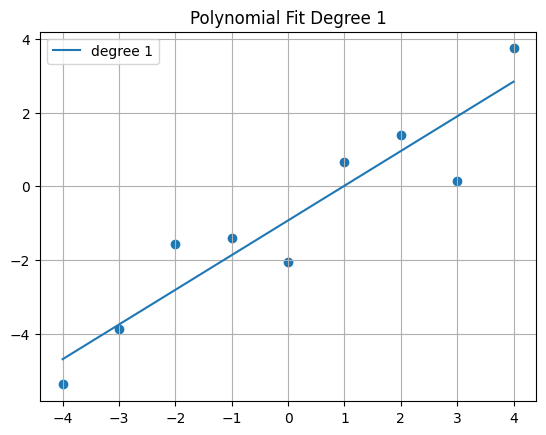

In [104]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def fit_poly(deg):
    pf = PolynomialFeatures(deg)
    Xp = pf.fit_transform(X.reshape(-1,1))
    model = LinearRegression().fit(Xp, y)
    yhat = model.predict(Xp)
    return yhat

d= 1
plt.scatter(X, y)
plt.plot(X, fit_poly(d), label=f"degree {d}")
plt.legend()
plt.title(f"Polynomial Fit Degree {d}")
plt.grid(True)
plt.show()

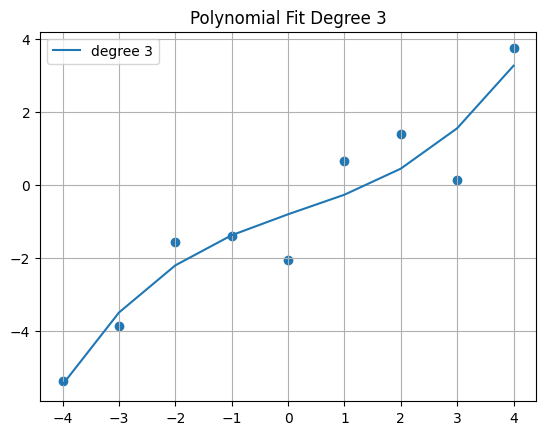

In [105]:
d= 3
plt.scatter(X, y)
plt.plot(X, fit_poly(d), label=f"degree {d}")
plt.legend()
plt.title(f"Polynomial Fit Degree {d}")
plt.grid(True)
plt.show()

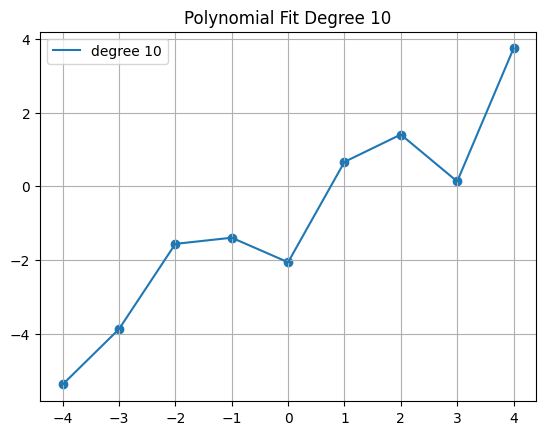

In [106]:
d= 10
plt.scatter(X, y)
plt.plot(X, fit_poly(d), label=f"degree {d}")
plt.legend()
plt.title(f"Polynomial Fit Degree {d}")
plt.grid(True)
plt.show()

In [107]:
# Let's suppose we have a test set, at values in between the integers

In [140]:
import random
random.seed(31415)
x1 = list(range(-4, 5))
y1 = [xi + 2*random.gauss() for xi in x]  # random.gauss() gives noise in N(0,1)
x2 = list(range(-4, 4))
x2 = [0.5+xi for xi in x2]
y2 = [xi + 2*random.gauss() for xi in x2]  # random.gauss() gives noise in N(0,1)

x1.extend(x2)
y1.extend(y2)

pairs = list(zip(x1, y1))
pairs_sorted = sorted(pairs, key=lambda p: p[0])

x_sorted, y_sorted = zip(*pairs_sorted)

x_sorted = list(x_sorted)
y_sorted = list(y_sorted)
list(zip(x_sorted,y_sorted))


[(-4, -5.3729660577870675),
 (-3.5, -5.51070174729281),
 (-3, -3.8711540919150544),
 (-2.5, -4.473893202527301),
 (-2, -1.5600542258887458),
 (-1.5, -1.1524854462881733),
 (-1, -1.3931552144999728),
 (-0.5, 0.6804149967054494),
 (0, -2.0592018844004354),
 (0.5, -2.553330797286105),
 (1, 0.6631879282549225),
 (1.5, -1.5611091028855166),
 (2, 1.4047983313865346),
 (2.5, -0.5564298024148955),
 (3, 0.13261451347305853),
 (3.5, 5.338592291776923),
 (4, 3.7386171355511175)]

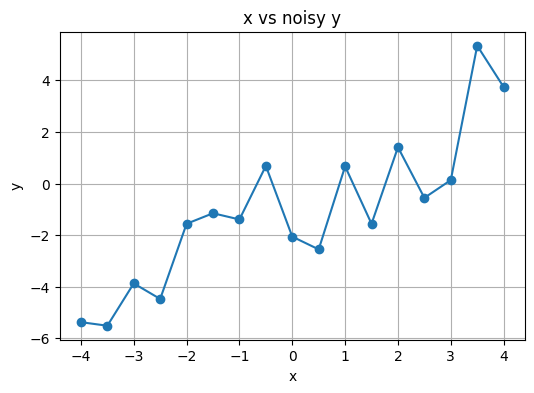

In [142]:
plt.figure(figsize=(6,4))
plt.plot(x_sorted, y_sorted, marker='o')   # Plot
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs noisy y")
plt.grid(True)
plt.show()



We have trained all these models on the function at integer values of x. The half-integer values can be our test set.